## Classification 
Dataset: weather_classification_data.csv

## Data Cleaning and Preparation

### 1. Loading Data

In [1]:
import pandas as pd

# Load the classification dataset
weather_data = pd.read_csv('weather_classification_data.csv')
print("Weather Classification Data:")
print(weather_data.head())


Weather Classification Data:
   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4       

### 2. Handling Missing Values

In [4]:
# Check for missing values
print(weather_data.isnull().sum())



Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


### 3. Data Transformation

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Cloud Cover', 'Season', 'Location', 'Weather Type']
for column in categorical_columns:
    le = LabelEncoder()
    weather_data[column] = le.fit_transform(weather_data[column])
    label_encoders[column] = le

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
weather_data[numerical_features] = scaler.fit_transform(weather_data[numerical_features])


### 4. Data Splitting

In [6]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X = weather_data.drop('Weather Type', axis=1)
y = weather_data['Weather Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Data Analysis and Visualization

### 1. Exploratory Data Analysis (EDA)

        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  1.320000e+04  1.320000e+04  1.320000e+04       1.320000e+04   
mean  -6.136505e-17  3.445056e-16  2.368476e-17       1.098112e-16   
std    1.000038e+00  1.000038e+00  1.000038e+00       1.000038e+00   
min   -2.538158e+00 -2.412206e+00 -1.423215e+00      -1.679256e+00   
25%   -8.701176e-01 -5.799313e-01 -6.994626e-01      -1.084490e+00   
50%    1.076993e-01  6.384073e-02 -1.204609e-01       1.363456e-01   
75%    6.828857e-01  7.571337e-01  5.309161e-01       8.876291e-01   
max    5.169340e+00  1.995157e+00  5.597181e+00       1.732823e+00   

        Cloud Cover  Atmospheric Pressure      UV Index        Season  \
count  13200.000000          1.320000e+04  1.320000e+04  13200.000000   
mean       1.990227         -5.307539e-16  4.844610e-18      1.849394   
std        1.012302          1.000038e+00  1.000038e+00      1.164824   
min        0.000000         -5.530053e+00 -1.038715e+00      0.000000   
25% 

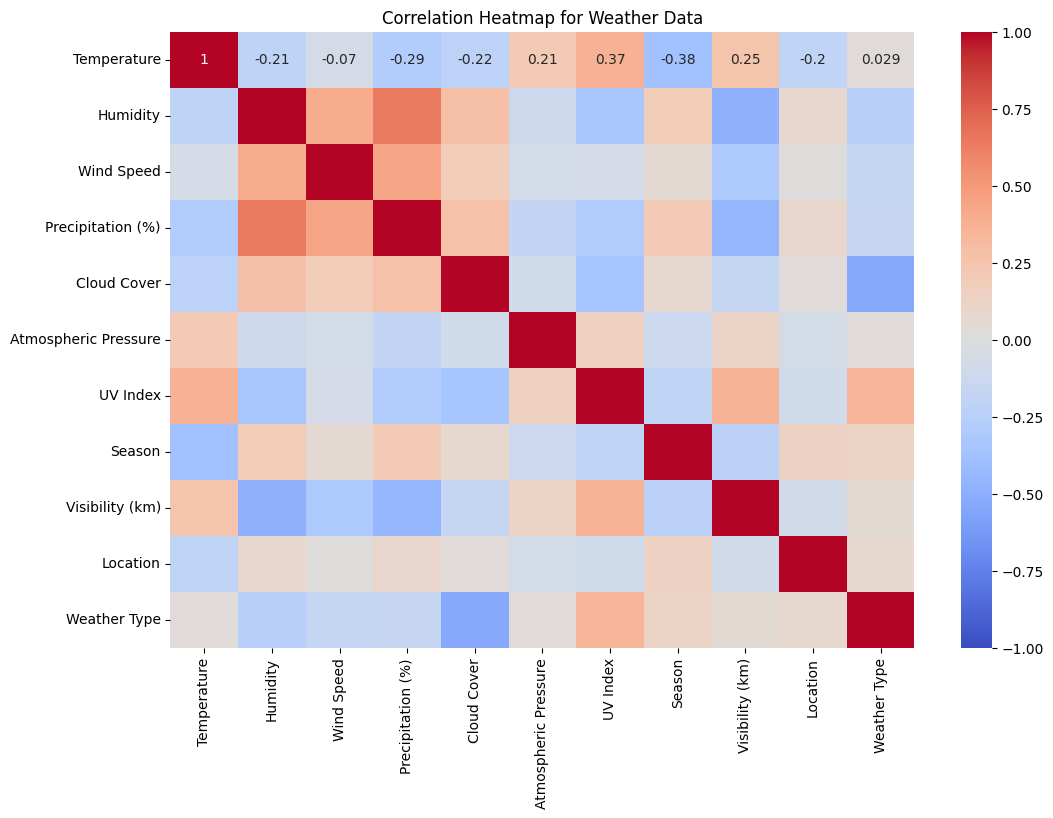

In [7]:
print(weather_data.describe())

# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(weather_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Weather Data')
plt.show()


### 2. Visualization

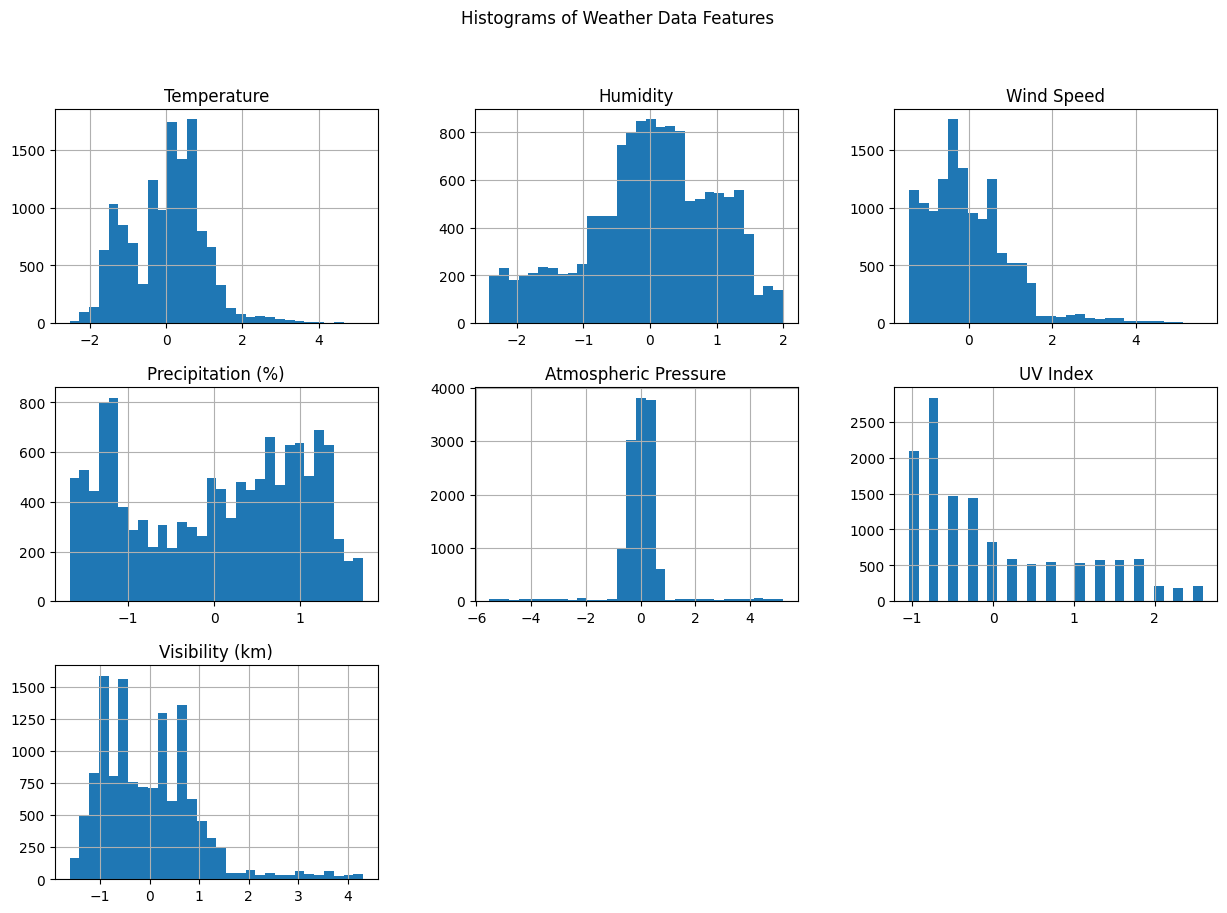

In [9]:
# Histograms
weather_data[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Weather Data Features')
plt.show()


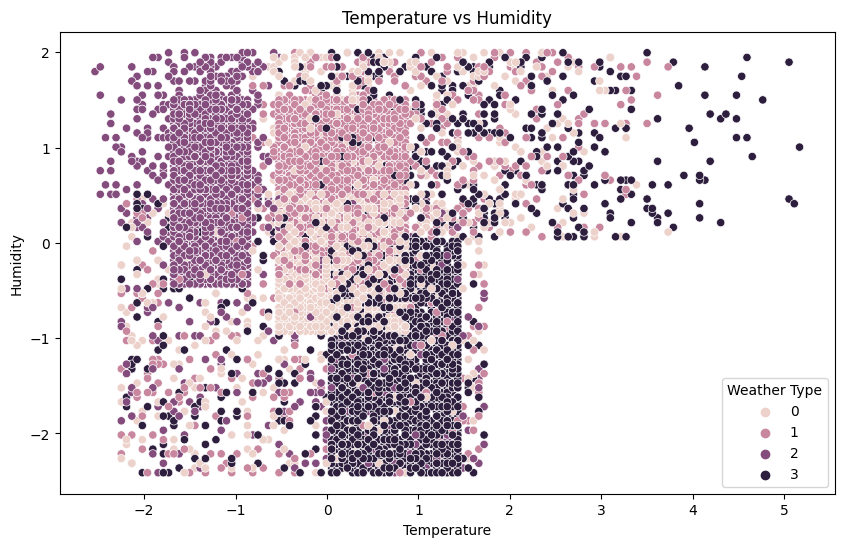

In [10]:

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Humidity', data=weather_data, hue='Weather Type')
plt.title('Temperature vs Humidity')
plt.show()



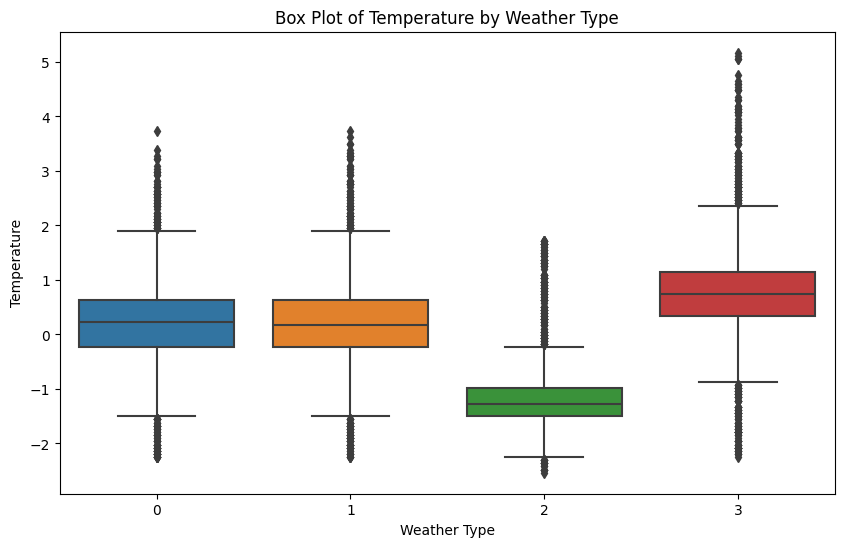

In [11]:

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather Type', y='Temperature', data=weather_data)
plt.title('Box Plot of Temperature by Weather Type')
plt.show()

## Machine Learning Models

### 1. Apply Classification Models

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_decision_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_decision_tree))

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_random_forest))
print("Accuracy:", accuracy_score(y_test, y_pred_random_forest))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       651
           1       0.84      0.83      0.84       647
           2       0.89      0.94      0.92       701
           3       0.85      0.80      0.83       641

    accuracy                           0.85      2640
   macro avg       0.85      0.85      0.85      2640
weighted avg       0.85      0.85      0.85      2640

Accuracy: 0.8484848484848485
Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       651
           1       0.90      0.89      0.90       647
           2       0.92      0.94      0.93       701
           3       0.91      0.90      0.91       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640

Accuracy: 0.906060606060606
Random Forest

## Model Evaluation and Comparison

### 1. Compare Model Performance

Logistic Regression Accuracy: 0.8485
Decision Tree Accuracy: 0.9061
Random Forest Accuracy: 0.9163


C:\Users\hp\anaconda33\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


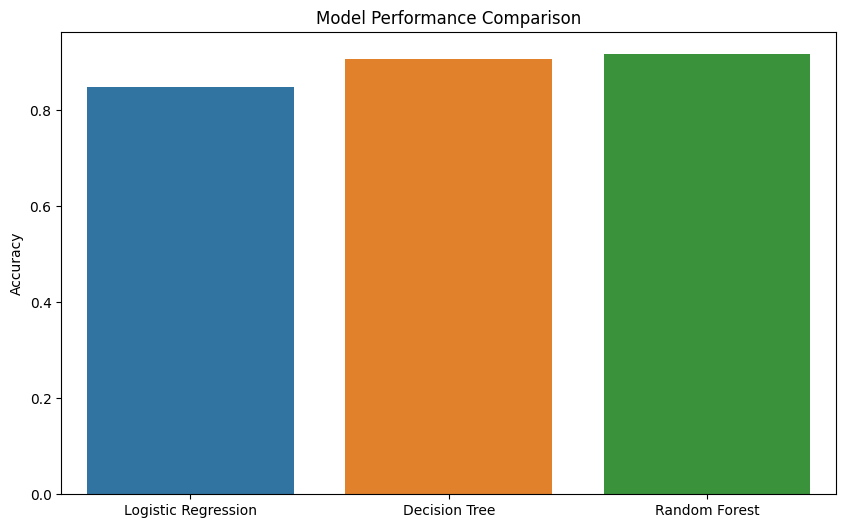

In [13]:
# Collect performance metrics
models = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log_reg),
    "Decision Tree": accuracy_score(y_test, y_pred_decision_tree),
    "Random Forest": accuracy_score(y_test, y_pred_random_forest)
}

# Display performance metrics
for model, accuracy in models.items():
    print(f"{model} Accuracy: {accuracy:.4f}")

# Visualization of model performance
plt.figure(figsize=(10, 6))
sns.barplot(x=list(models.keys()), y=list(models.values()))
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.show()
